In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet as cdt
%matplotlib inline

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [33]:
pd.set_option('display.max_columns', 999)

In [65]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [66]:
df_train.shape,df_test.shape

((13730, 167), (4570, 43))

# Ánalise exploratória

In [67]:
df_train.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [68]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

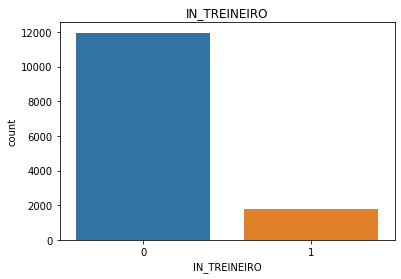

In [69]:
# Análise dos dados
sns.countplot(df_train['IN_TREINEIRO'])
plt.title('IN_TREINEIRO')
plt.show()

#### Remover as features da base de treino, que não estão na base de teste

In [70]:
df_train = pd.concat([df_train['IN_TREINEIRO'], df_train[test.columns.tolist()]],axis=1)

#### Remover features com muitos nulos

In [71]:
df_aux = pd.DataFrame({'Type': df_train.dtypes,
                      'Missing': df_train.isna().sum(),
                      'Size': df_train.shape[0],
                       'Unique': df_train.nunique()
                     })
df_aux['Missing_%']= df_aux.Missing/df_aux.Size * 100
df_aux

,Type,Missing,Size,Unique,Missing_%
IN_TREINEIRO,int64,0,13730,2,0.000000
NU_INSCRICAO,object,0,13730,13730,0.000000
CO_UF_RESIDENCIA,int64,0,13730,27,0.000000
SG_UF_RESIDENCIA,object,0,13730,27,0.000000
NU_IDADE,int64,0,13730,55,0.000000
TP_SEXO,object,0,13730,2,0.000000
TP_COR_RACA,int64,0,13730,6,0.000000
TP_NACIONALIDADE,int64,0,13730,5,0.000000
TP_ST_CONCLUSAO,int64,0,13730,4,0.000000
TP_ANO_CONCLUIU,int64,0,13730,11,0.000000


In [72]:
df_train.drop(columns=['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027'], inplace=True)

### perfil dos treineiros

In [73]:
df_train[df_train['IN_TREINEIRO']==1].describe()

,IN_TREINEIRO,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,1783.0,1783.000000,1783.000000,1783.000000,1783.000000,1783.0,1783.0,1783.0,1783.0,1783.0,1783.0,1783.0,1783.0,1783.000000,1783.0,1783.0,1783.000000,1783.000000,1783.000000,1783.000000,1532.000000,1532.000000,1505.000000,1783.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000
mean,1.0,29.844644,16.213685,2.210881,1.038699,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.010656,0.0,0.0,0.860348,0.860348,0.844083,0.844083,467.038838,520.210444,511.825249,0.547392,1.112957,119.189369,110.033223,104.345515,111.043189,74.710963,519.322259
std,0.0,9.744087,0.754183,1.036026,0.217539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102706,0.0,0.0,0.348338,0.348338,0.362878,0.362878,63.735444,70.872867,67.616087,0.497889,0.730599,30.143838,32.666292,32.616203,32.371495,41.214115,148.876351
min,1.0,11.000000,13.000000,0.000000,0.000000,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,364.300000,326.700000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,23.000000,16.000000,1.000000,1.000000,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,417.375000,470.750000,462.000000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,460.000000
50%,1.0,29.000000,16.000000,3.000000,1.000000,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,455.600000,523.750000,516.000000,1.000000,1.000000,120.000000,120.000000,100.000000,120.000000,80.000000,520.000000
75%,1.0,35.000000,17.000000,3.000000,1.000000,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,506.600000,571.125000,560.500000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,1.0,53.000000,18.000000,5.000000,4.000000,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,2.000000,2.000000,1.000000,1.000000,766.500000,711.900000,718.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


#### caracteristicas que definem um treineiro:

> Idade máxima de 18 anos

> Não concluiram o ensino médio ainda

> `TP_ST_CONCLUSAO` == 3 , ou seja, esta cursando o ensino médio e vai concluir após 2016



In [74]:
df_train = df_train[['NU_INSCRICAO','IN_TREINEIRO','NU_IDADE','TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU']]
df_test = df_test[['NU_INSCRICAO','NU_IDADE','TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU']]

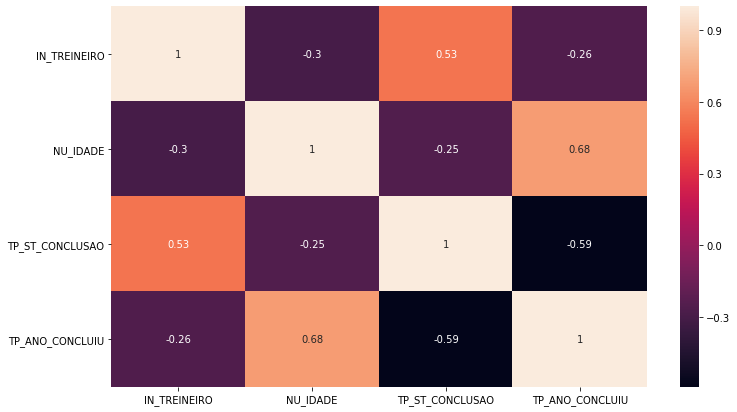

In [77]:
#Verificando a correlação das variáveis contínuas com a variável target
corr = df_train.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True)

## Aplicando o modelo

In [75]:
x_train = df_train.drop(['IN_TREINEIRO','NU_INSCRICAO'],axis=1)
y_train = df_train['IN_TREINEIRO']
x_test = df_test.drop(['NU_INSCRICAO'],axis=1)

In [38]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#### separar base de teste e de treino

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(x_train, 
                                                    y_train, 
                                                    test_size = 0.2, 
                                                    random_state = 101)

In [58]:
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, Y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, Y_train)
    acc = round(model.score(X_train, Y_train) * 100, 4)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  Y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(Y_train, train_pred) * 100, 4)
    
    return train_pred, acc, acc_cv

In [59]:
# Logistic Regression
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)

print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Accuracy: 99.0623
Accuracy CV 10-Fold: 99.0623


In [60]:
#Light GBM Classifier
train_pred_lgbm, acc_lgbm, acc_cv_lgbm = fit_ml_algo(LGBMClassifier(), 
                                                                X_train, 
                                                                Y_train,
                                                                10)
print("Accuracy: %s" % acc_lgbm)
print("Accuracy CV 10-Fold: %s" % acc_cv_lgbm)

Accuracy: 99.6996
Accuracy CV 10-Fold: 99.6996


#### Random Forest

In [61]:
#Random Forest Classifier
train_pred_forest, acc_forest, acc_cv_forest = fit_ml_algo(RandomForestClassifier(), 
                                                           X_train, 
                                                           Y_train,
                                                                10)
print("Accuracy: %s" % acc_forest)
print("Accuracy CV 10-Fold: %s" % acc_cv_forest)

Accuracy: 99.6996
Accuracy CV 10-Fold: 99.6996


In [62]:
cv_models = pd.DataFrame({
    'Model': ['Logistic Regression','Light GBM', 'Random Forest'],
    'Score': [ acc_cv_log, acc_cv_lgbm, acc_cv_forest]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
1,Light GBM,99.6996
2,Random Forest,99.6996
0,Logistic Regression,99.0623


#### Tunning do Random Forest Classifier

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 2000).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator para usar no random search
estimator = RandomForestClassifier()

# random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1)

# Fit 
rs.fit(X_train, Y_train)

In [53]:
rs.best_params_ # mostra quais são os melhores parametros para o Random Forest

{'n_estimators': 334,
 'min_samples_split': 5,
 'max_leaf_nodes': 24,
 'max_features': None,
 'max_depth': 5,
 'bootstrap': True}

In [54]:
Y_val_pred = rs.predict(X_val)

metrics.accuracy_score(Y_val, Y_val_pred)

0.9970866715222141

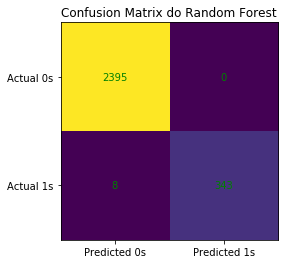

In [56]:
cm_forest = confusion_matrix(Y_val, Y_val_pred)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm_forest)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_forest[i, j], ha='center', va='center', color='green')
plt.title('Confusion Matrix do Random Forest')
plt.show()

In [63]:
y_test_pred = rs.predict(x_test)

In [76]:
answer=pd.DataFrame()
answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']
answer['IN_TREINEIRO'] = y_test_pred 
answer.to_csv('answer.csv', index=False, header=True)